In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
from utils_q import *
from pia_unet_quantile import *
from multichannels_constants import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


t_couner 0


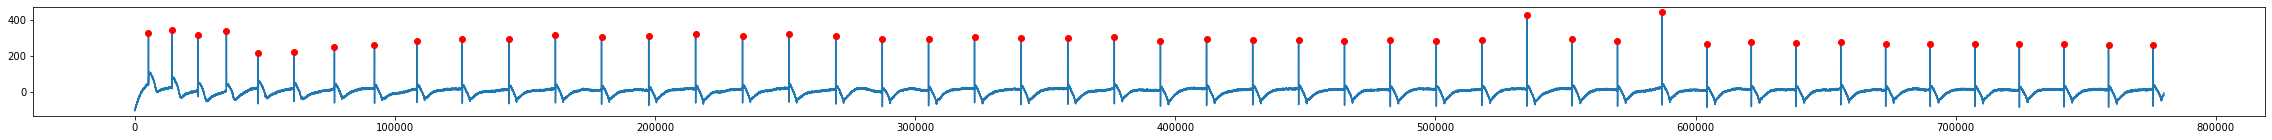

channel 0 (420000, 1200000)
channel 1 (420000, 1200000)
channel 2 (420000, 1200000)
channel 3 (420000, 1200000)
channel 4 (420000, 1200000)
channel 5 (420000, 1200000)
channel 6 (420000, 1200000)
channel 7 (420000, 1200000)
channel 8 (420000, 1200000)
channel 9 (420000, 1200000)
channel 10 (420000, 1200000)
channel 11 (420000, 1200000)
channel 12 (420000, 1200000)
channel 13 (420000, 1200000)
channel 14 (420000, 1200000)
channel 15 (420000, 1200000)
channel 16 (420000, 1200000)
channel 17 (420000, 1200000)
channel 18 (420000, 1200000)
channel 19 (420000, 1200000)
channel 20 (420000, 1200000)
channel 21 (420000, 1200000)
channel 22 (420000, 1200000)
channel 23 (420000, 1200000)
channel 24 (420000, 1200000)
channel 25 (420000, 1200000)
channel 26 (420000, 1200000)
channel 27 (420000, 1200000)
channel 28 (420000, 1200000)
channel 29 (420000, 1200000)
channel 30 (420000, 1200000)
channel 31 (420000, 1200000)
channel 32 (420000, 1200000)
channel 33 (420000, 1200000)
channel 34 (420000, 1200

In [ ]:
multi_channel_data =  np.load('multichannels_data/multi_channel_data.npy')
dic_eaps,df,eaps,iaps = raw_to_seg( multi_channel_data,times_with_signals,fs,lowcut,highcut,ps, ds,order,0,eap_channels,iap_channels  )
with open('multichannels_data/dic_segmented_data.pkl', 'wb') as f:
    pickle.dump(dic_eaps, f)
df.to_csv('multichannels_data/df_segmented_data.csv')

# with open('multichannels_data/dic_segmented_data.pkl', 'rb') as f:
#     dic_eaps = pickle.load(f)
# # Load the DataFrame
# df = pd.read_csv('multichannels_data/df_segmented_data.csv')
# eaps = np.array([dic_eaps[(i,'eap_raw_norm')] for i in df[df['eAP']==True].index])
# iaps = np.array([dic_eaps[(i,'iap_raw_norm')] for i in df[df['eAP']==False].index])
# eaps = eaps[:,0,:]
# iaps = iaps[:,0,:]

In [5]:
model_ = 'saved_model/data-4__seed-20__kernel_size-11__ch_num-32__depth-8__wph-0.02__lr-0.005__epoch-150__physics-True__max_sample-300__.h5'
model =load_model(model_, compile = False)

In [6]:
dic_eaps,df2 =  return_preds (model,eaps, dic_eaps,df)

514/514 [==============================] - 26s 39ms/step


In [7]:
# here we get the apd values for the ref channel
apd1_iap,df2_iap = return_apds_singlechannel(df2[df2['eAP']==False],dic_eaps)
# here we get the apd values for the predicted iAPS
apd_pred1, apd_pred2, apd_pred3,df2,df2_filtered = return_apds_3channels(df2[df['eAP']==True],dic_eaps) # df3 is df with iap filtered


(322, 1, 8000)
(322, 8000)


/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=35

ap1 done
(322, 10)
ap1 done
ap2 done
ap3 done


[2295, 2574, 2853, 3132, 3411, 3690, 3969, 4248, 4527, 4806, 5085, 5364, 5643, 5922, 6201, 6480, 6759, 7038, 7317, 7596, 7875, 8154, 8433, 8712, 8991, 9270, 9549, 9828, 10107, 10386, 10665, 10944, 11223, 11502, 11781, 12060, 12339, 12618, 13176, 13455, 13734, 14013, 14292, 14571, 14850, 15129, 15408, 15687, 15966, 16245]


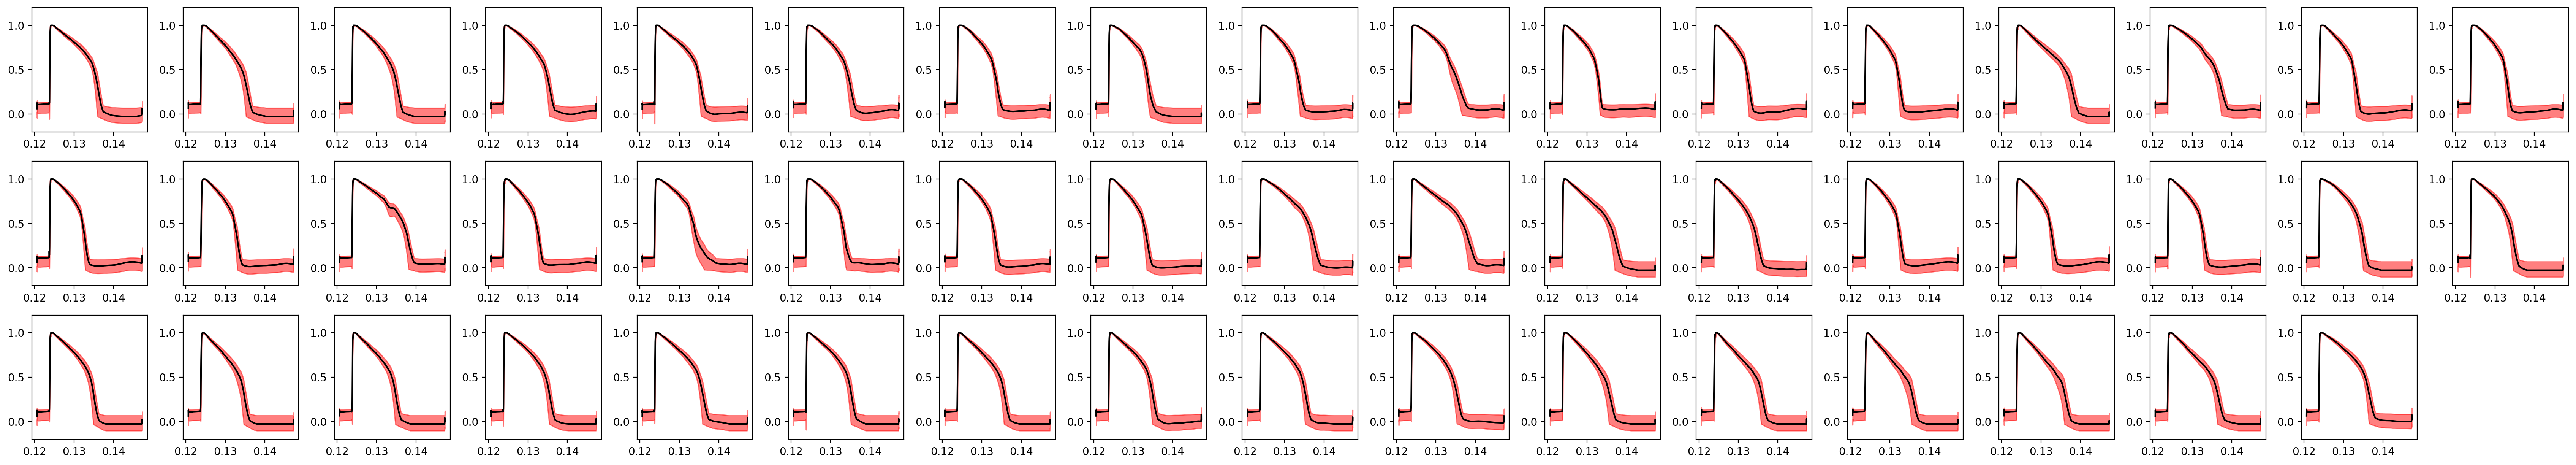

[2295, 2574, 2853, 3132, 3411, 3690, 3969, 4248, 4527, 4806, 5085, 5364, 5643, 5922, 6201, 6480, 6759, 7038, 7317, 7596, 7875, 8154, 8433, 8712, 8991, 9270, 9549, 9828, 10107, 10386, 10665, 10944, 11223, 11502, 11781, 12060, 12339, 12618, 13176, 13455, 13734, 14013, 14292, 14571, 14850, 15129, 15408, 15687, 15966, 16245]


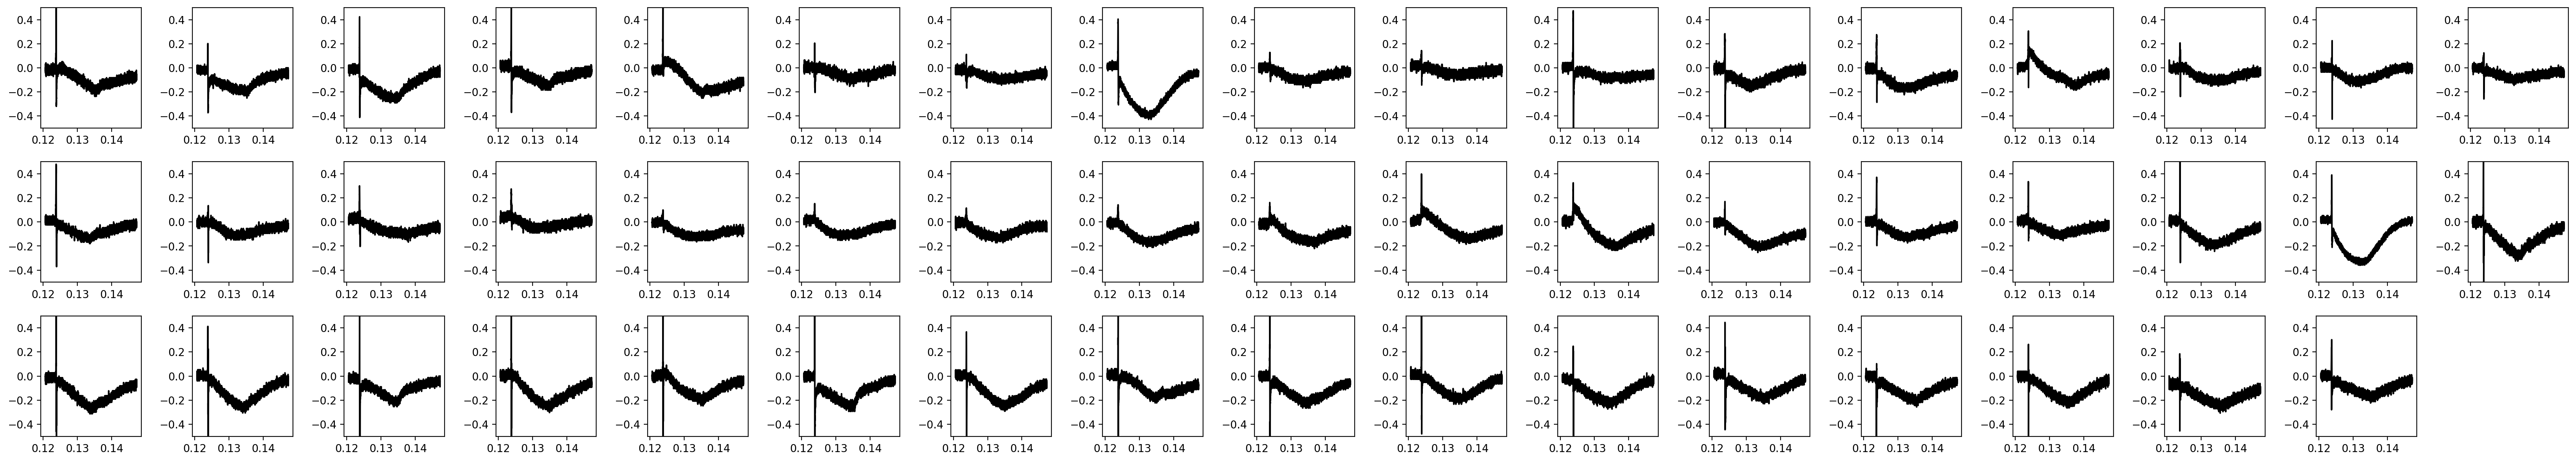

[16524]


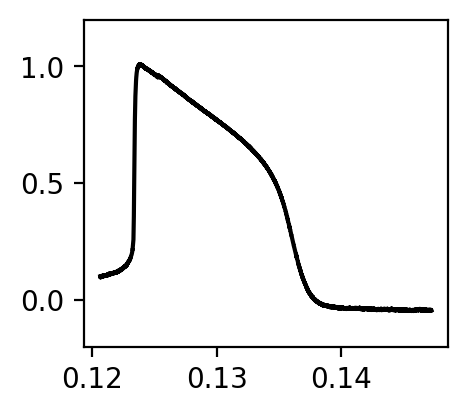

In [12]:
t = df2_filtered['p2'].unique() # p2 are the minute the spike happens at channel base which we choose, so we can find all corresponding spikes at that time
n = 102 
all_channels_plotters(df2_filtered,t[n],dic_eaps,iap = True,save_path = 'results/preds2.svg')
all_channels_plotters(df2_filtered,t[n],dic_eaps,iap = False,save_path = 'results/eaps2.svg')
all_channels_plotters(df2_iap,t[n],dic_eaps,iap = True, raster = False, save_path = 'results/iaps.svg')

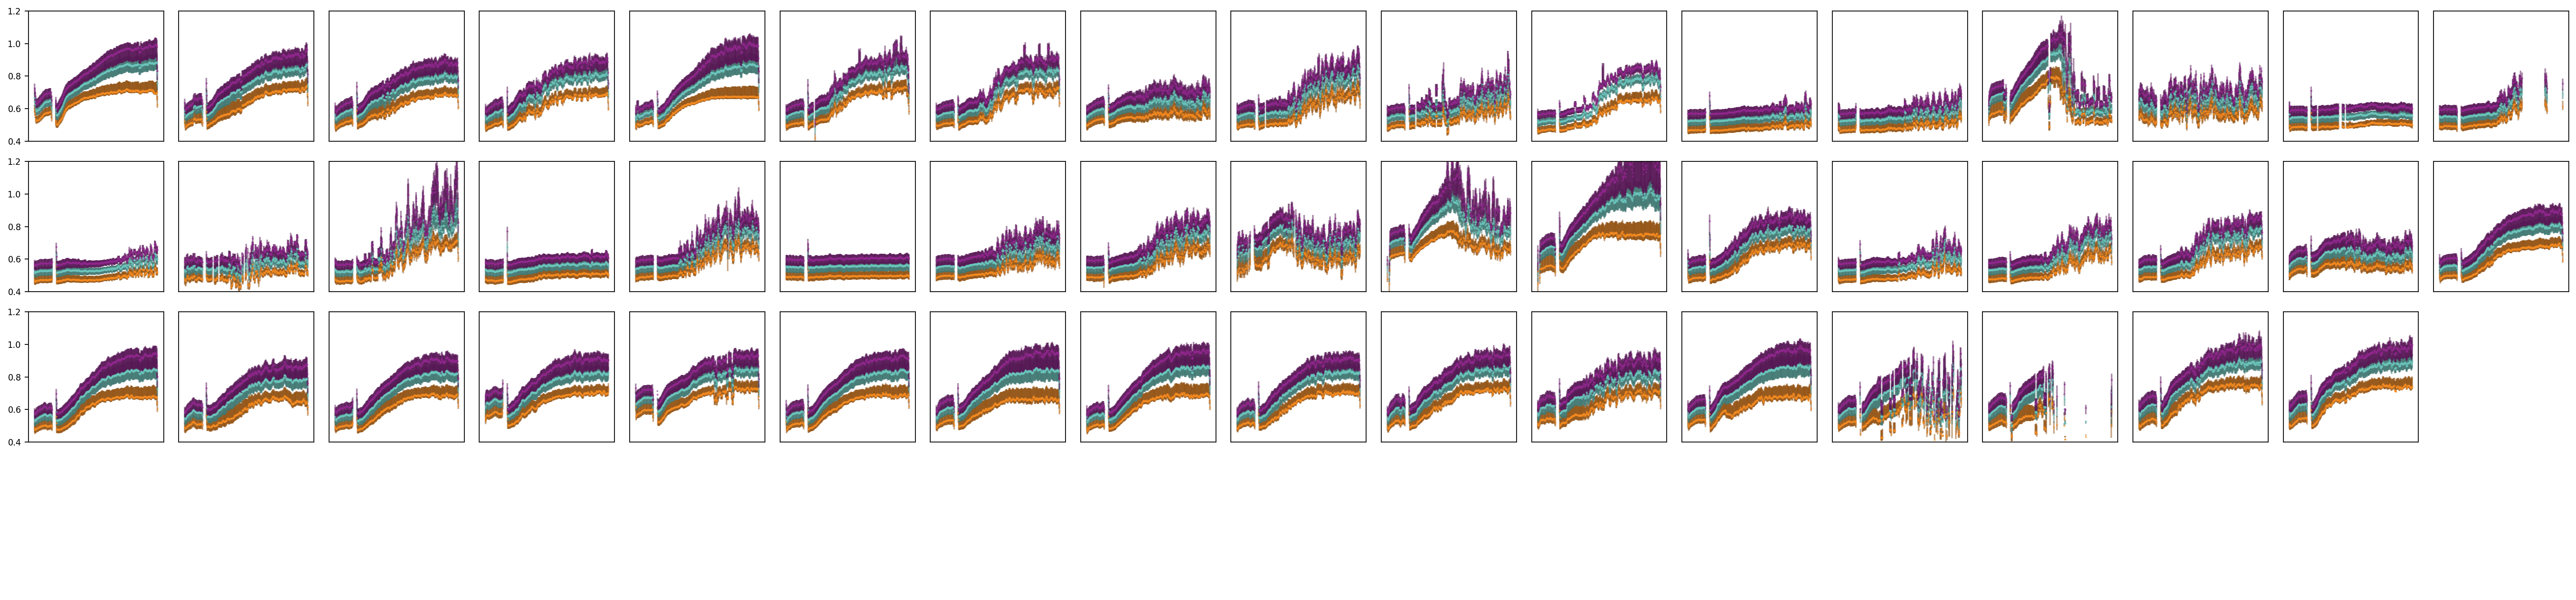

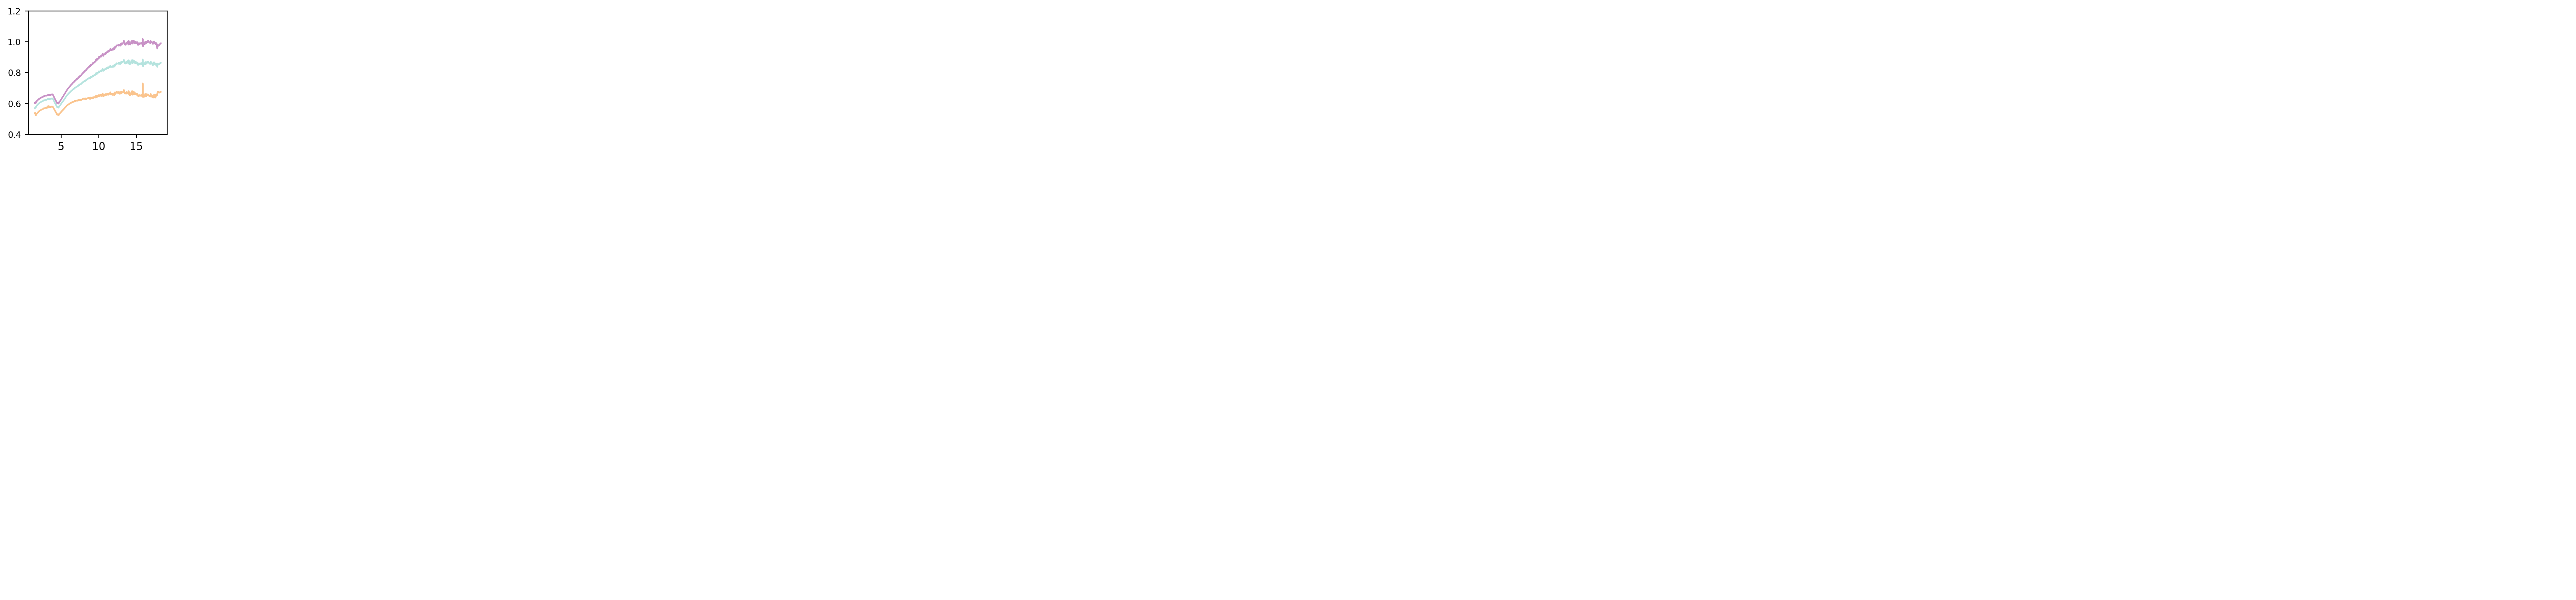

In [13]:
all_channels_apd_plotters(df2_filtered)
single_channel_apd_plotters(df2_iap) # referncee one

ch 0
0
3.3333333333333335 33 3.356743333333333
1
5.833333333333333 2264 5.855036666666667
2
8.333333333333334 2313 8.3249
3
10.833333333333334 2363 10.834293333333333


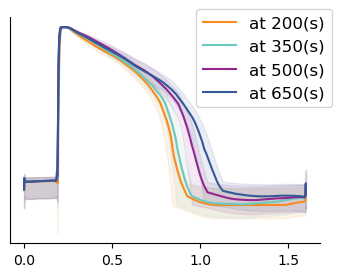

In [14]:
times_to_plot_in_sec = [200,350,500,650]
ch = 0
samples_from_plot_channel_change_over_time(dic_eaps,ch,df2_filtered, times_to_plot_in_sec )

mean  mean_perc  apd    ch
0    -126.452715  -6.618666  3.0   0.0
1     472.201076  28.073126  3.0   1.0
2     330.008852  18.242516  3.0   2.0
3     364.026119  21.430706  3.0   3.0
4    -113.865188  -6.311208  3.0   4.0
..           ...        ...  ...   ...
195  1283.368812  41.343549  9.0  46.0
196   479.111541  15.722033  9.0  47.0
197    68.619285   2.212336  9.0  48.0
198  1442.421355  45.700501  9.0  49.0
199  1399.499907  43.932240  9.0  50.0

[200 rows x 4 columns]

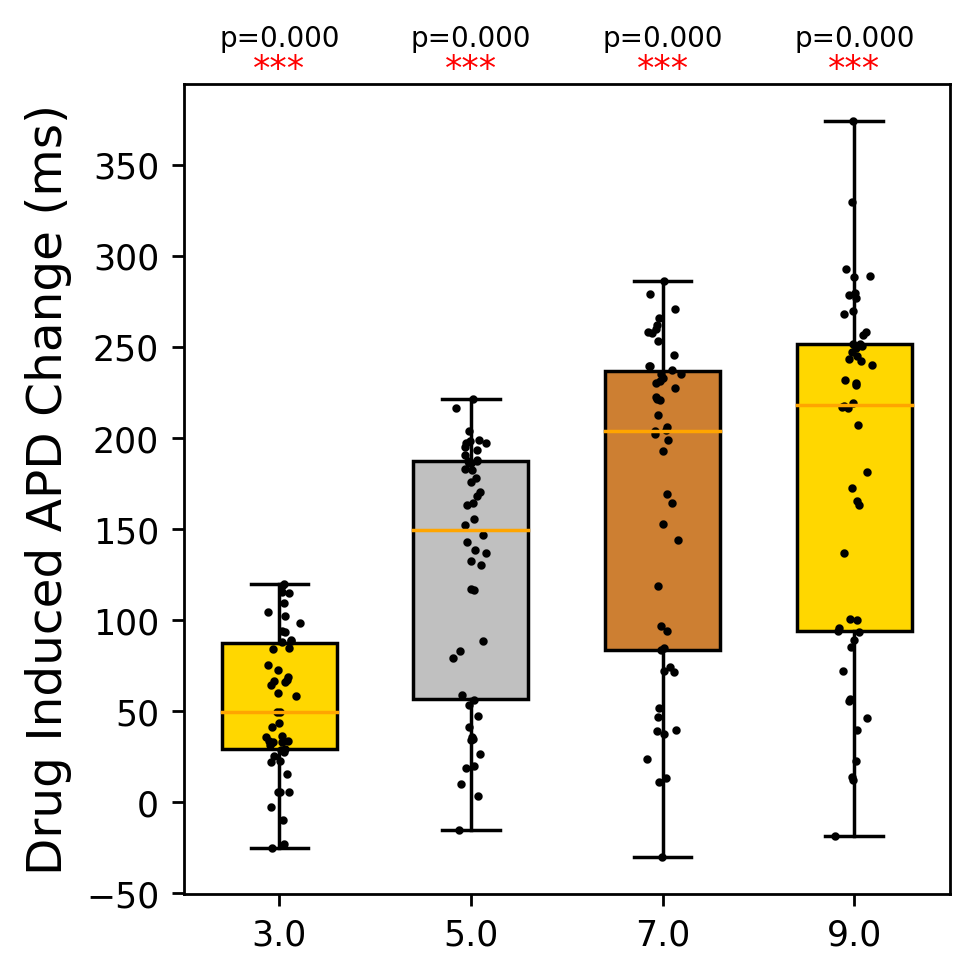

mean  mean_perc  apd    ch
0    -126.452715  -6.618666  3.0   0.0
1     472.201076  28.073126  3.0   1.0
2     330.008852  18.242516  3.0   2.0
3     364.026119  21.430706  3.0   3.0
4    -113.865188  -6.311208  3.0   4.0
..           ...        ...  ...   ...
195  1283.368812  41.343549  9.0  46.0
196   479.111541  15.722033  9.0  47.0
197    68.619285   2.212336  9.0  48.0
198  1442.421355  45.700501  9.0  49.0
199  1399.499907  43.932240  9.0  50.0

[200 rows x 4 columns]

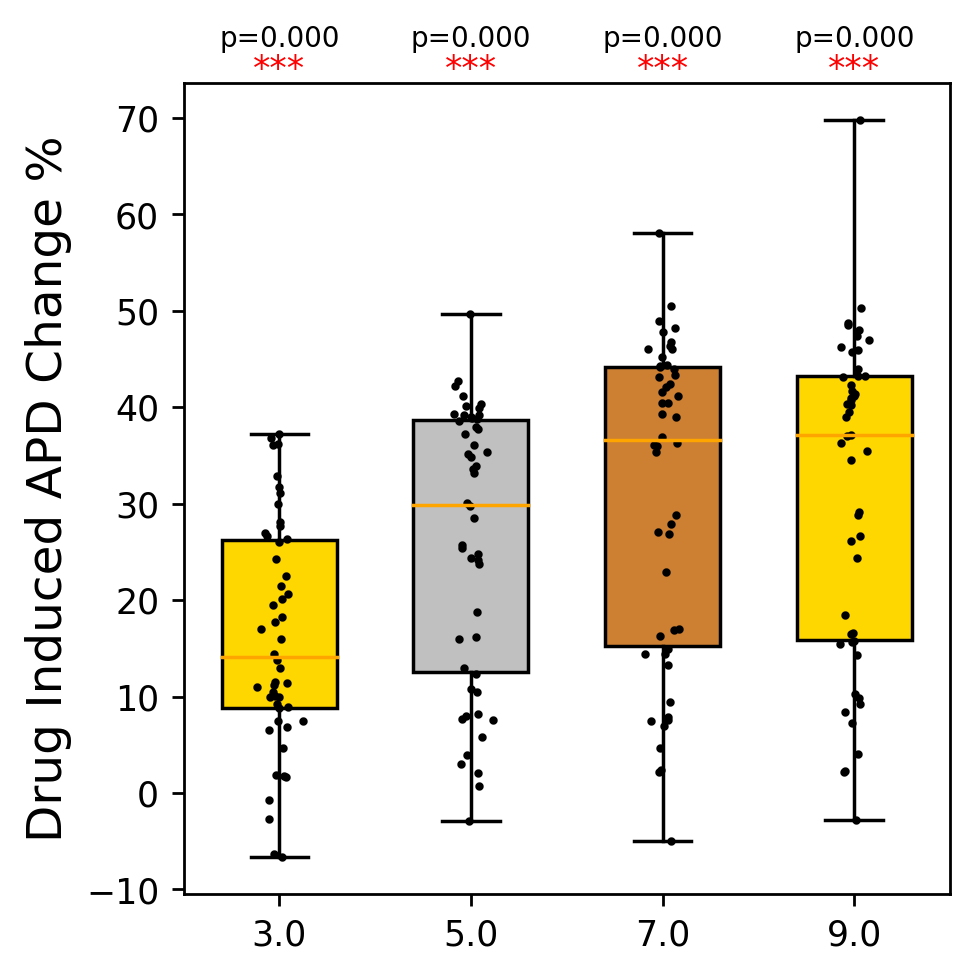

In [15]:
drug_time_in_sec = 250
apd_changes_summary(df2_filtered, drug_time_in_sec, perc=False)
apd_changes_summary(df2_filtered, drug_time_in_sec, perc=True)


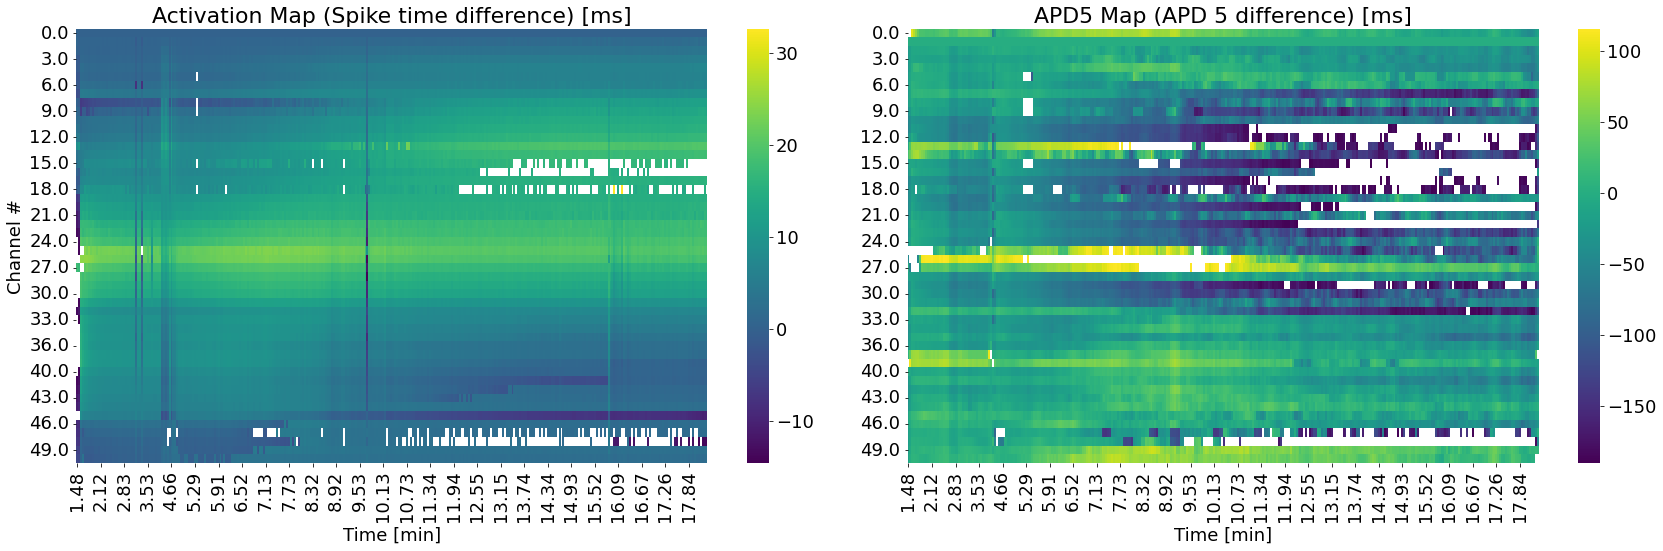

In [17]:
activation_vs_apd(df,df2_filtered, apd_numb = 9)

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
from utils_q import *
from pia_unet_quantile import *
from multichannels_constants import *

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


t_couner 0


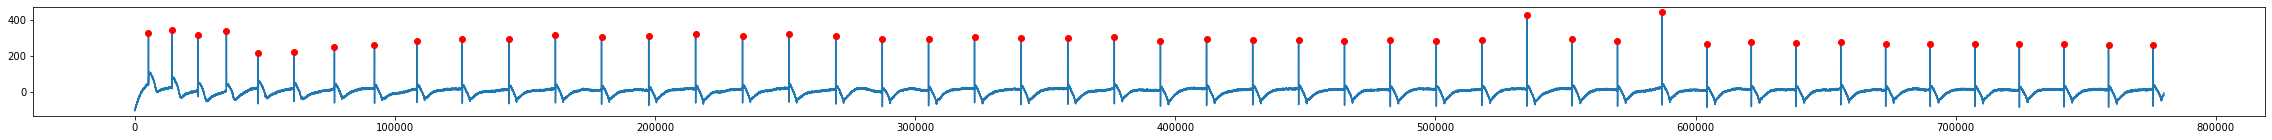

channel 0 (420000, 1200000)
channel 1 (420000, 1200000)
channel 2 (420000, 1200000)
channel 3 (420000, 1200000)
channel 4 (420000, 1200000)
channel 5 (420000, 1200000)
channel 6 (420000, 1200000)
channel 7 (420000, 1200000)
channel 8 (420000, 1200000)
channel 9 (420000, 1200000)
channel 10 (420000, 1200000)
channel 11 (420000, 1200000)
channel 12 (420000, 1200000)
channel 13 (420000, 1200000)
channel 14 (420000, 1200000)
channel 15 (420000, 1200000)
channel 16 (420000, 1200000)
channel 17 (420000, 1200000)
channel 18 (420000, 1200000)
channel 19 (420000, 1200000)
channel 20 (420000, 1200000)
channel 21 (420000, 1200000)
channel 22 (420000, 1200000)
channel 23 (420000, 1200000)
channel 24 (420000, 1200000)
channel 25 (420000, 1200000)
channel 26 (420000, 1200000)
channel 27 (420000, 1200000)
channel 28 (420000, 1200000)
channel 29 (420000, 1200000)
channel 30 (420000, 1200000)
channel 31 (420000, 1200000)
channel 32 (420000, 1200000)
channel 33 (420000, 1200000)
channel 34 (420000, 1200

In [ ]:
multi_channel_data =  np.load('multichannels_data/multi_channel_data.npy')
dic_eaps,df,eaps,iaps = raw_to_seg( multi_channel_data,times_with_signals,fs,lowcut,highcut,ps, ds,order,0,eap_channels,iap_channels  )
with open('multichannels_data/dic_segmented_data.pkl', 'wb') as f:
    pickle.dump(dic_eaps, f)
df.to_csv('multichannels_data/df_segmented_data.csv')

# with open('multichannels_data/dic_segmented_data.pkl', 'rb') as f:
#     dic_eaps = pickle.load(f)
# # Load the DataFrame
# df = pd.read_csv('multichannels_data/df_segmented_data.csv')
# eaps = np.array([dic_eaps[(i,'eap_raw_norm')] for i in df[df['eAP']==True].index])
# iaps = np.array([dic_eaps[(i,'iap_raw_norm')] for i in df[df['eAP']==False].index])
# eaps = eaps[:,0,:]
# iaps = iaps[:,0,:]

In [5]:
model_ = 'saved_model/data-4__seed-20__kernel_size-11__ch_num-32__depth-8__wph-0.02__lr-0.005__epoch-150__physics-True__max_sample-300__.h5'
model =load_model(model_, compile = False)

In [6]:
dic_eaps,df2 =  return_preds (model,eaps, dic_eaps,df)

514/514 [==============================] - 26s 39ms/step


In [7]:
# here we get the apd values for the ref channel
apd1_iap,df2_iap = return_apds_singlechannel(df2[df2['eAP']==False],dic_eaps)
# here we get the apd values for the predicted iAPS
apd_pred1, apd_pred2, apd_pred3,df2,df2_filtered = return_apds_3channels(df2[df['eAP']==True],dic_eaps) # df3 is df with iap filtered


(322, 1, 8000)
(322, 8000)


/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=3500)[0], rel_height=relheight)
/home/ubuntu/texasfile/paper_codes/QPIA-UNET/utils_q.py:162: PeakPropertyWarning: some peaks have a width of 0
  w, h, l, _ = peak_widths(period, find_peaks(period, distance=35

ap1 done
(322, 10)
ap1 done
ap2 done
ap3 done


[2295, 2574, 2853, 3132, 3411, 3690, 3969, 4248, 4527, 4806, 5085, 5364, 5643, 5922, 6201, 6480, 6759, 7038, 7317, 7596, 7875, 8154, 8433, 8712, 8991, 9270, 9549, 9828, 10107, 10386, 10665, 10944, 11223, 11502, 11781, 12060, 12339, 12618, 13176, 13455, 13734, 14013, 14292, 14571, 14850, 15129, 15408, 15687, 15966, 16245]


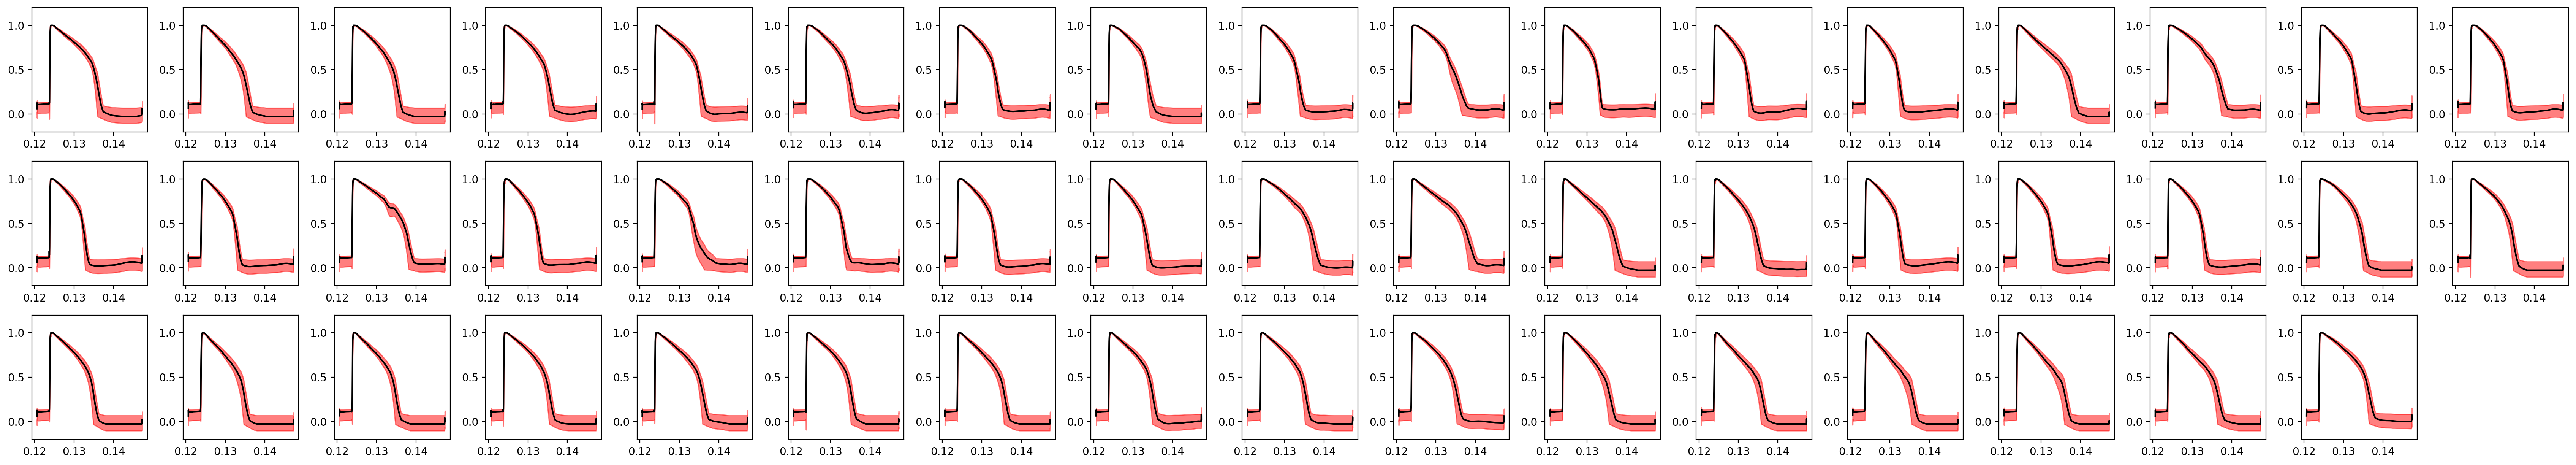

[2295, 2574, 2853, 3132, 3411, 3690, 3969, 4248, 4527, 4806, 5085, 5364, 5643, 5922, 6201, 6480, 6759, 7038, 7317, 7596, 7875, 8154, 8433, 8712, 8991, 9270, 9549, 9828, 10107, 10386, 10665, 10944, 11223, 11502, 11781, 12060, 12339, 12618, 13176, 13455, 13734, 14013, 14292, 14571, 14850, 15129, 15408, 15687, 15966, 16245]


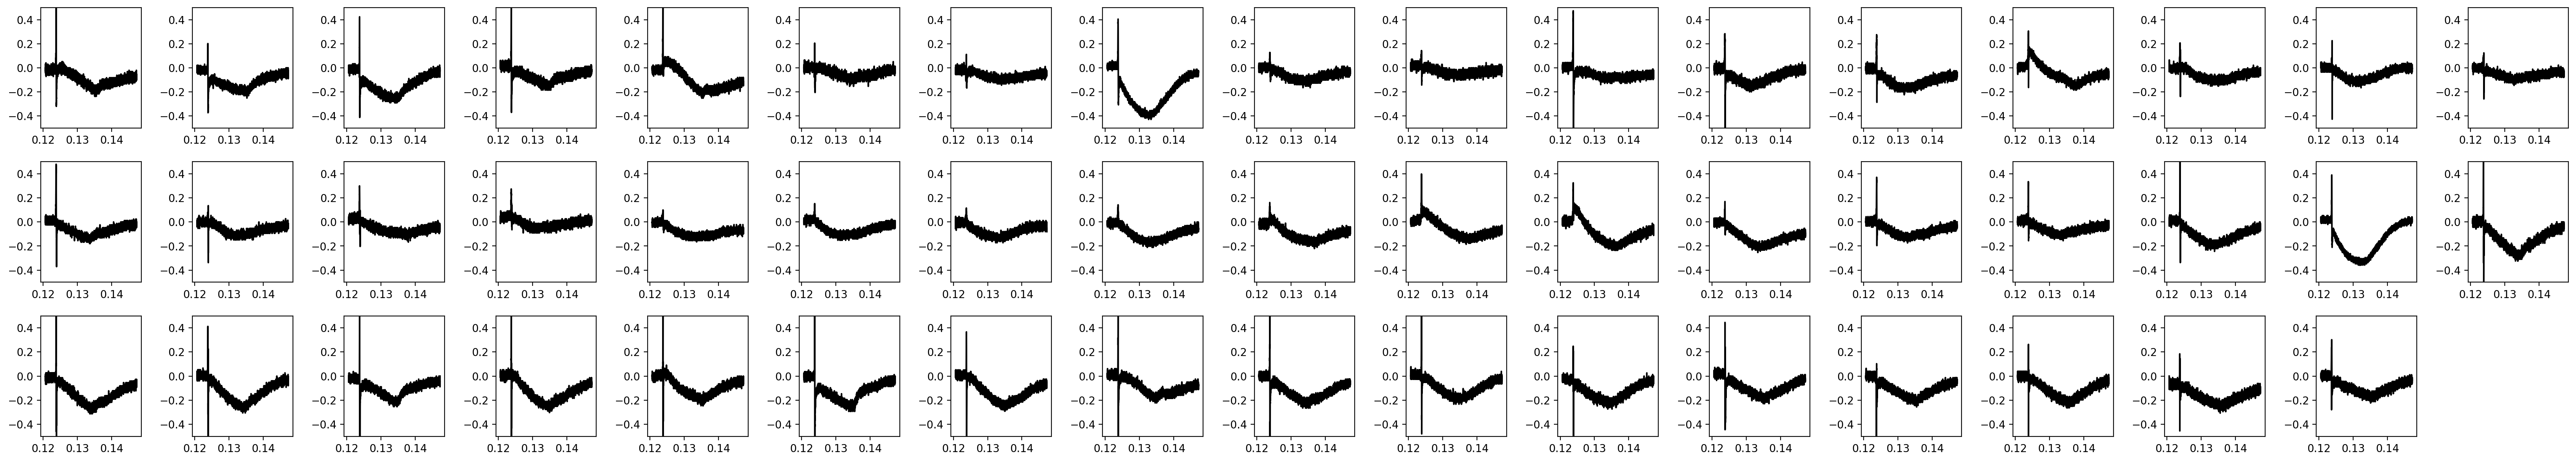

[16524]


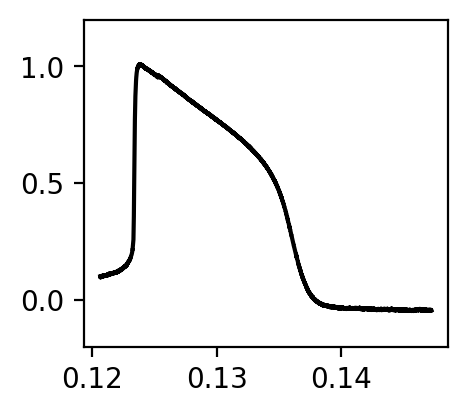

In [12]:
t = df2_filtered['p2'].unique() # p2 are the minute the spike happens at channel base which we choose, so we can find all corresponding spikes at that time
n = 102 
all_channels_plotters(df2_filtered,t[n],dic_eaps,iap = True,save_path = 'results/preds2.svg')
all_channels_plotters(df2_filtered,t[n],dic_eaps,iap = False,save_path = 'results/eaps2.svg')
all_channels_plotters(df2_iap,t[n],dic_eaps,iap = True, raster = False, save_path = 'results/iaps.svg')

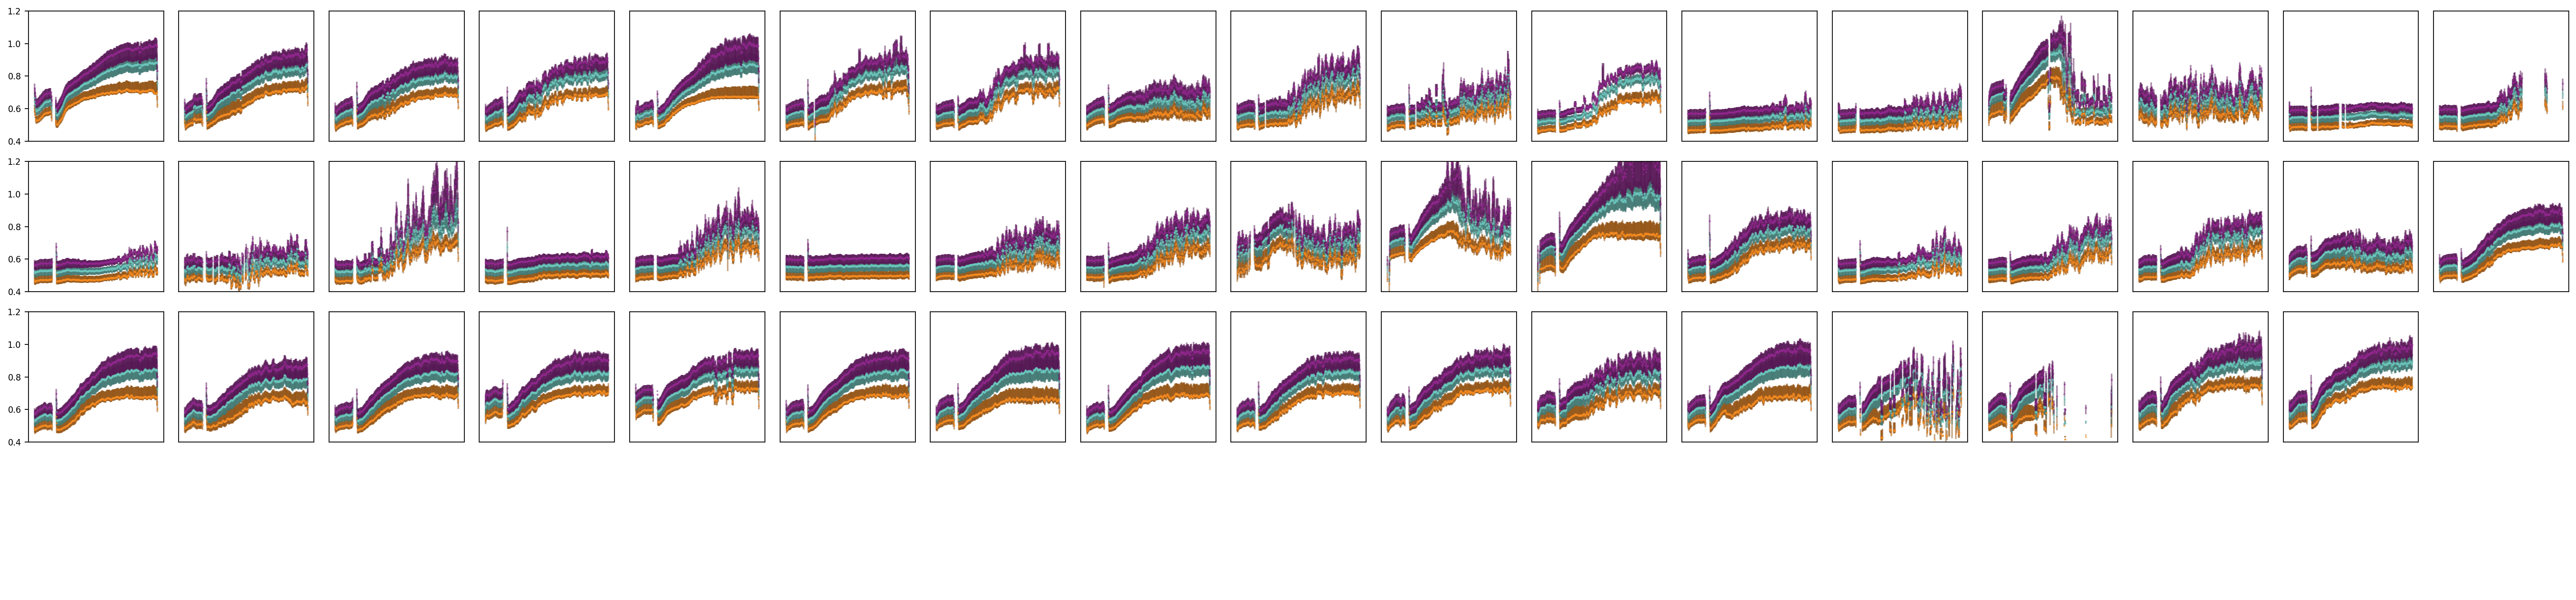

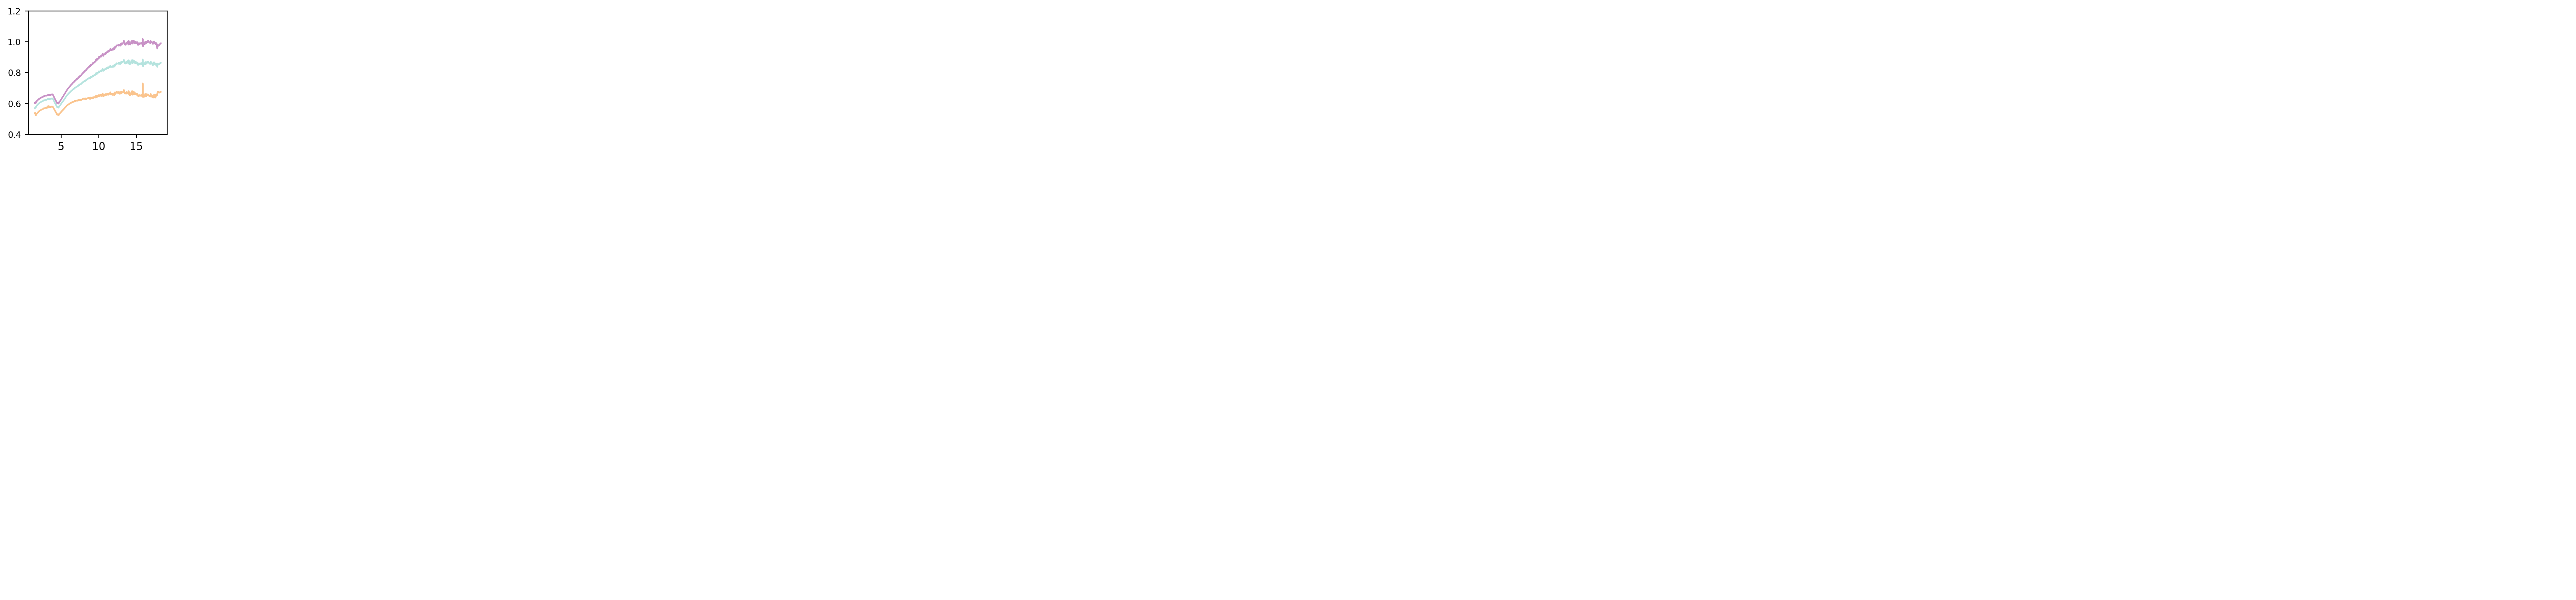

In [13]:
all_channels_apd_plotters(df2_filtered)
single_channel_apd_plotters(df2_iap) # referncee one

ch 0
0
3.3333333333333335 33 3.356743333333333
1
5.833333333333333 2264 5.855036666666667
2
8.333333333333334 2313 8.3249
3
10.833333333333334 2363 10.834293333333333


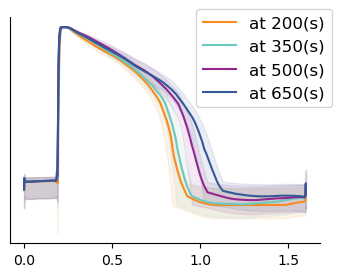

In [14]:
times_to_plot_in_sec = [200,350,500,650]
ch = 0
samples_from_plot_channel_change_over_time(dic_eaps,ch,df2_filtered, times_to_plot_in_sec )

mean  mean_perc  apd    ch
0    -126.452715  -6.618666  3.0   0.0
1     472.201076  28.073126  3.0   1.0
2     330.008852  18.242516  3.0   2.0
3     364.026119  21.430706  3.0   3.0
4    -113.865188  -6.311208  3.0   4.0
..           ...        ...  ...   ...
195  1283.368812  41.343549  9.0  46.0
196   479.111541  15.722033  9.0  47.0
197    68.619285   2.212336  9.0  48.0
198  1442.421355  45.700501  9.0  49.0
199  1399.499907  43.932240  9.0  50.0

[200 rows x 4 columns]

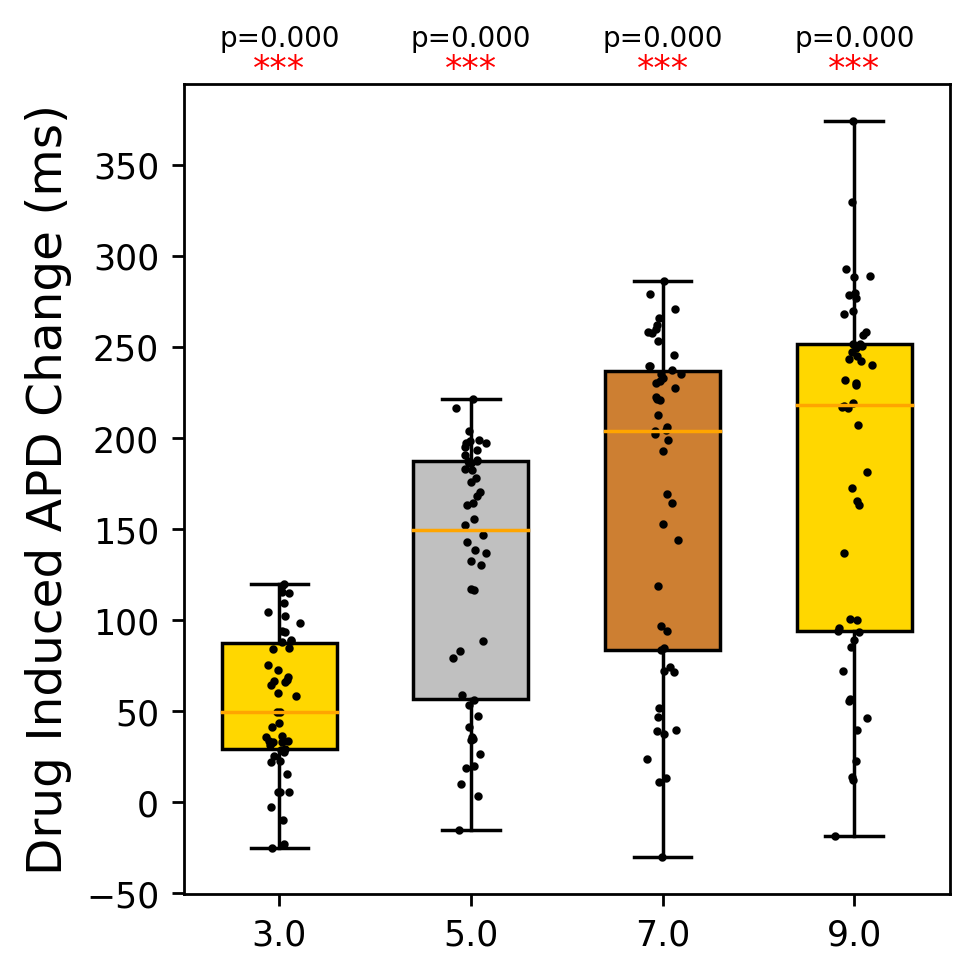

mean  mean_perc  apd    ch
0    -126.452715  -6.618666  3.0   0.0
1     472.201076  28.073126  3.0   1.0
2     330.008852  18.242516  3.0   2.0
3     364.026119  21.430706  3.0   3.0
4    -113.865188  -6.311208  3.0   4.0
..           ...        ...  ...   ...
195  1283.368812  41.343549  9.0  46.0
196   479.111541  15.722033  9.0  47.0
197    68.619285   2.212336  9.0  48.0
198  1442.421355  45.700501  9.0  49.0
199  1399.499907  43.932240  9.0  50.0

[200 rows x 4 columns]

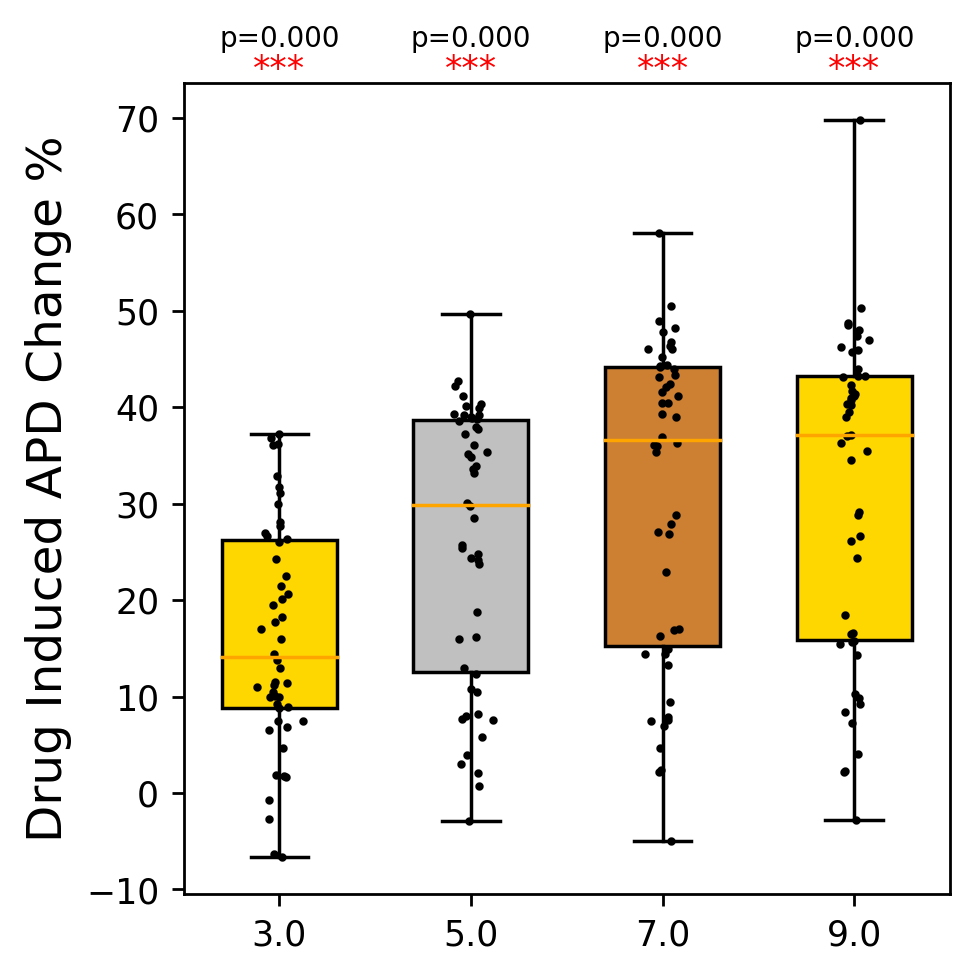

In [15]:
drug_time_in_sec = 250
apd_changes_summary(df2_filtered, drug_time_in_sec, perc=False)
apd_changes_summary(df2_filtered, drug_time_in_sec, perc=True)


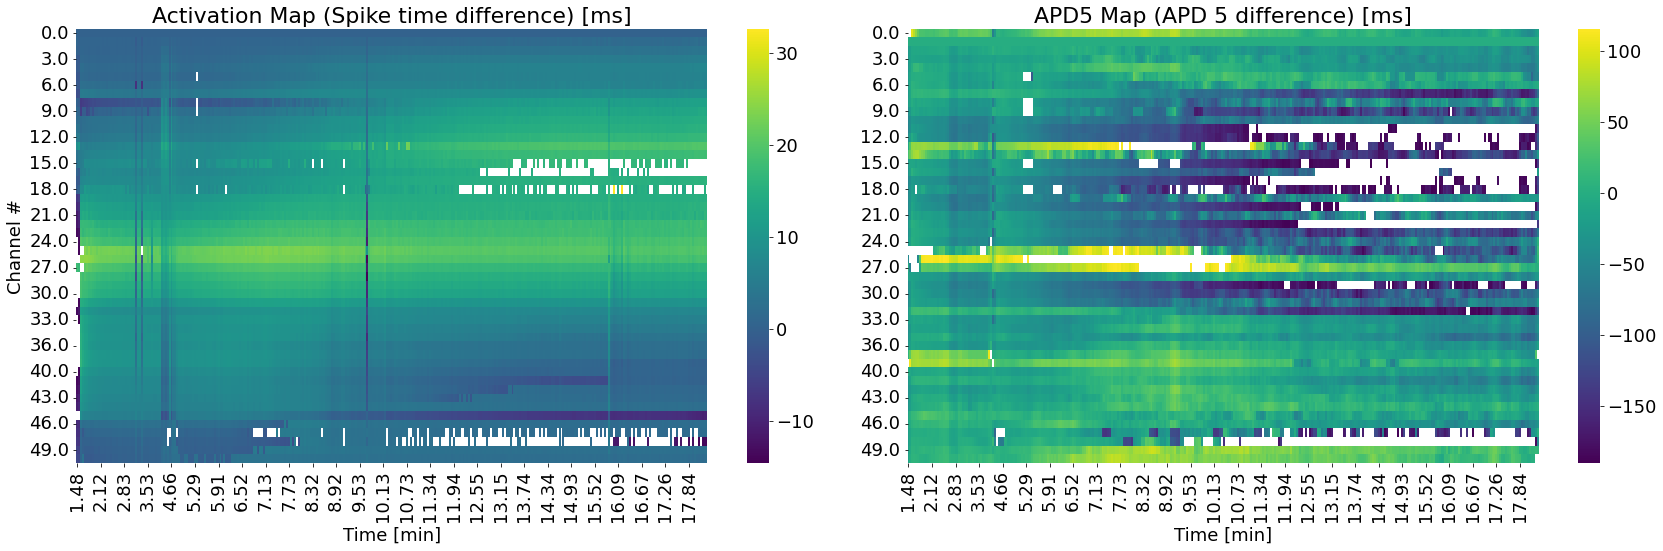

In [17]:
activation_vs_apd(df,df2_filtered, apd_numb = 9)